In [1]:
# HW5
# Andrew Logue

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder 
import copy
from IPython.display import Image
from sklearn.pipeline import make_pipeline
%matplotlib inline
sns.set() 

In [2]:
# SVM

# 1. Arrange the data into featues and target arrays.
df = pd.read_csv('accident.csv')

In [3]:
# change categorical values of sex to numeric values

labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Sex'] = labelencoder.fit_transform(df['Sex']) 

print(df['Sex'].unique())

df

[1 0]


,PassengerId,Survived,class,Name,Sex,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,8.0500
...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",1,30.0000


In [4]:
X_train_SVM = df.iloc[:,[2,4,5]]
Y_train_SVM = df.iloc[:,1]

print(X_train_SVM.shape)
print(Y_train_SVM.shape)

(891, 3)
(891,)


In [5]:
# verify no nan values:
X_train_SVM.isna().apply(pd.value_counts)

,class,Sex,Fare
False,891,891,891


In [6]:
Y_train_SVM.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# 2. Split data into a training set and test set
#    Splitting data into 80% training and 20% test data

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(
    X_train_SVM, Y_train_SVM, test_size=0.2, random_state=1, stratify=Y_train_SVM)
# Standardize the features to account for different types of data
# Doing this helps the ML algorithm 

sc = StandardScaler()
sc.fit(X_train_SVM)
X_train_SVM_std = sc.transform(X_train_SVM)
X_test_SVM_std = sc.transform(X_test_SVM)
# first linear

In [8]:
# 3. Select the ML algorithm, and its parameteters
svm = SVC(kernel='linear')

In [9]:
# 4. Build the model (.fit)
svm.fit(X_train_SVM_std, y_train_SVM)

SVC(kernel='linear')

In [10]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)
y_pred_SVM = svm.predict(X_test_SVM_std)
svm_proformance = metrics.accuracy_score(y_test_SVM, y_pred_SVM)
print(svm_proformance)

0.8044692737430168


In [11]:
# 3. Select the ML algorithm, and its parameteters
svm = SVC(kernel='rbf')

In [12]:
# 4. Build the model (.fit)
svm.fit(X_train_SVM_std, y_train_SVM)

SVC()

In [13]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)
y_pred_SVM = svm.predict(X_test_SVM_std)
svm_proformance = metrics.accuracy_score(y_test_SVM, y_pred_SVM)
print(svm_proformance)

0.8100558659217877


In [14]:
# KNN

In [15]:
# Step 1 - Read in the data set and perform preliminary checks

# read the dataset

print(df)


     PassengerId  Survived  class  \
0              1         0      3   
1              2         1      1   
2              3         1      3   
3              4         1      1   
4              5         0      3   
..           ...       ...    ...   
886          887         0      2   
887          888         1      1   
888          889         0      3   
889          890         1      1   
890          891         0      3   

                                                  Name  Sex     Fare  
0                              Braund, Mr. Owen Harris    1   7.2500  
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  71.2833  
2                               Heikkinen, Miss. Laina    0   7.9250  
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  53.1000  
4                             Allen, Mr. William Henry    1   8.0500  
..                                                 ...  ...      ...  
886                              Montvila, Rev. Juozas    

In [16]:
print(df.info())

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   class        891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB
None
Index(['PassengerId', 'Survived', 'class', 'Name', 'Sex', 'Fare'], dtype='object')


In [17]:
# Step 2 - Check missing values, outliers, and nuniqueistics
df.isna().apply(pd.value_counts)

,PassengerId,Survived,class,Name,Sex,Fare
False,891,891,891,891,891,891


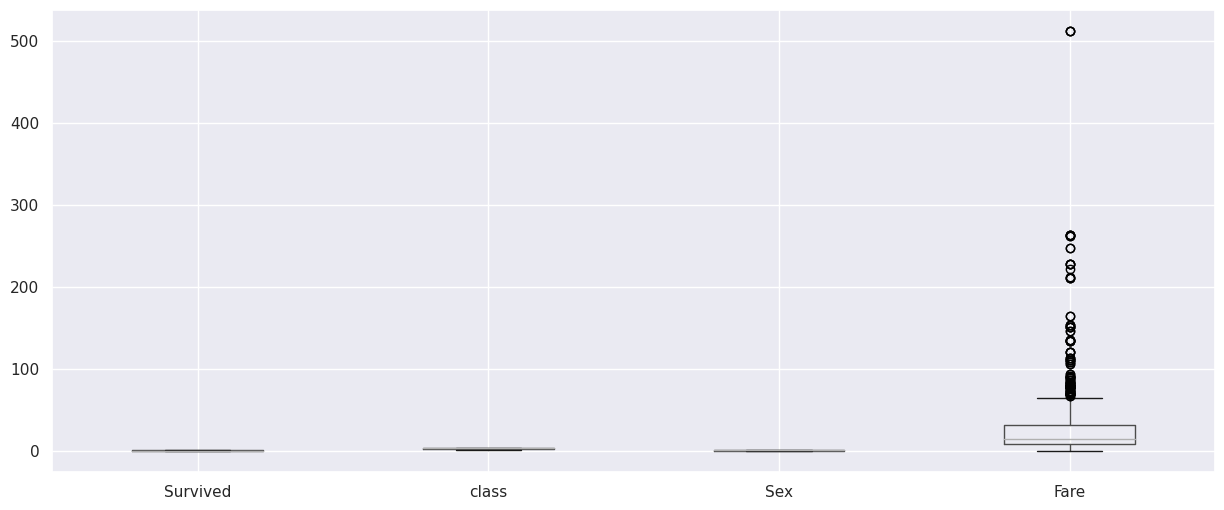

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
class,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.0,0.0000,1.0000,1.0,1.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [18]:
# Check outliers of the features
df.iloc[:,1:].boxplot(figsize = (15,6)) # make boxplot to see outliers
plt.show()
df.iloc[:,1:].describe().T

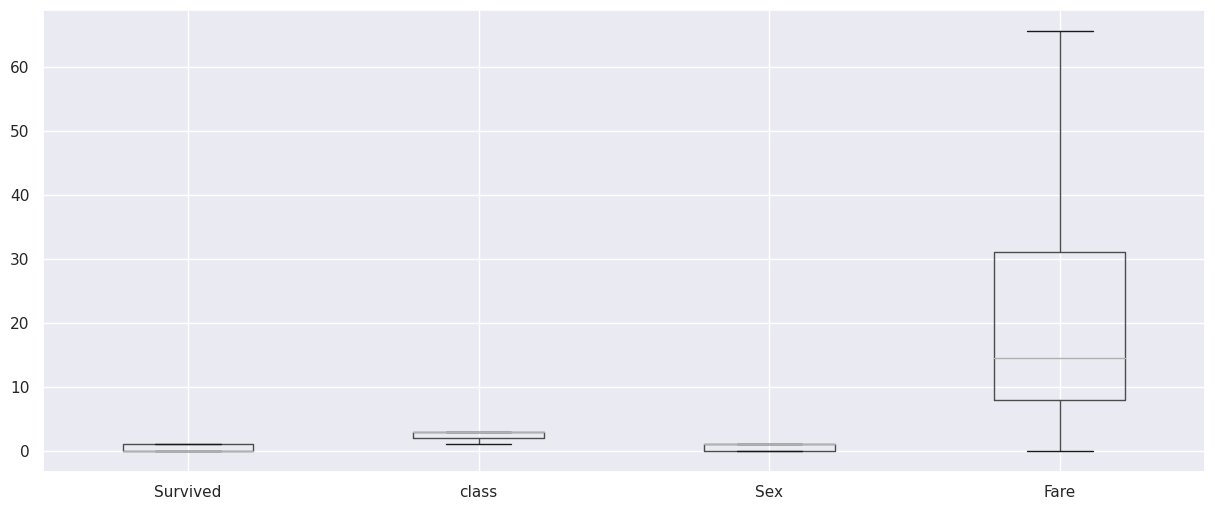

In [19]:
cols = df.iloc[:,[2,4,5]]
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df.loc[(df[col] < (q1 - 1.5 * iqr)), col] = (q1 - 1.5 * iqr)
    df.loc[(df[col] > (q3 + 1.5 * iqr)), col] = (q3 + 1.5 * iqr)
# make a new boxplot to check if removing them worked
df.iloc[:,1:].boxplot(figsize = (15,6))
plt.show()

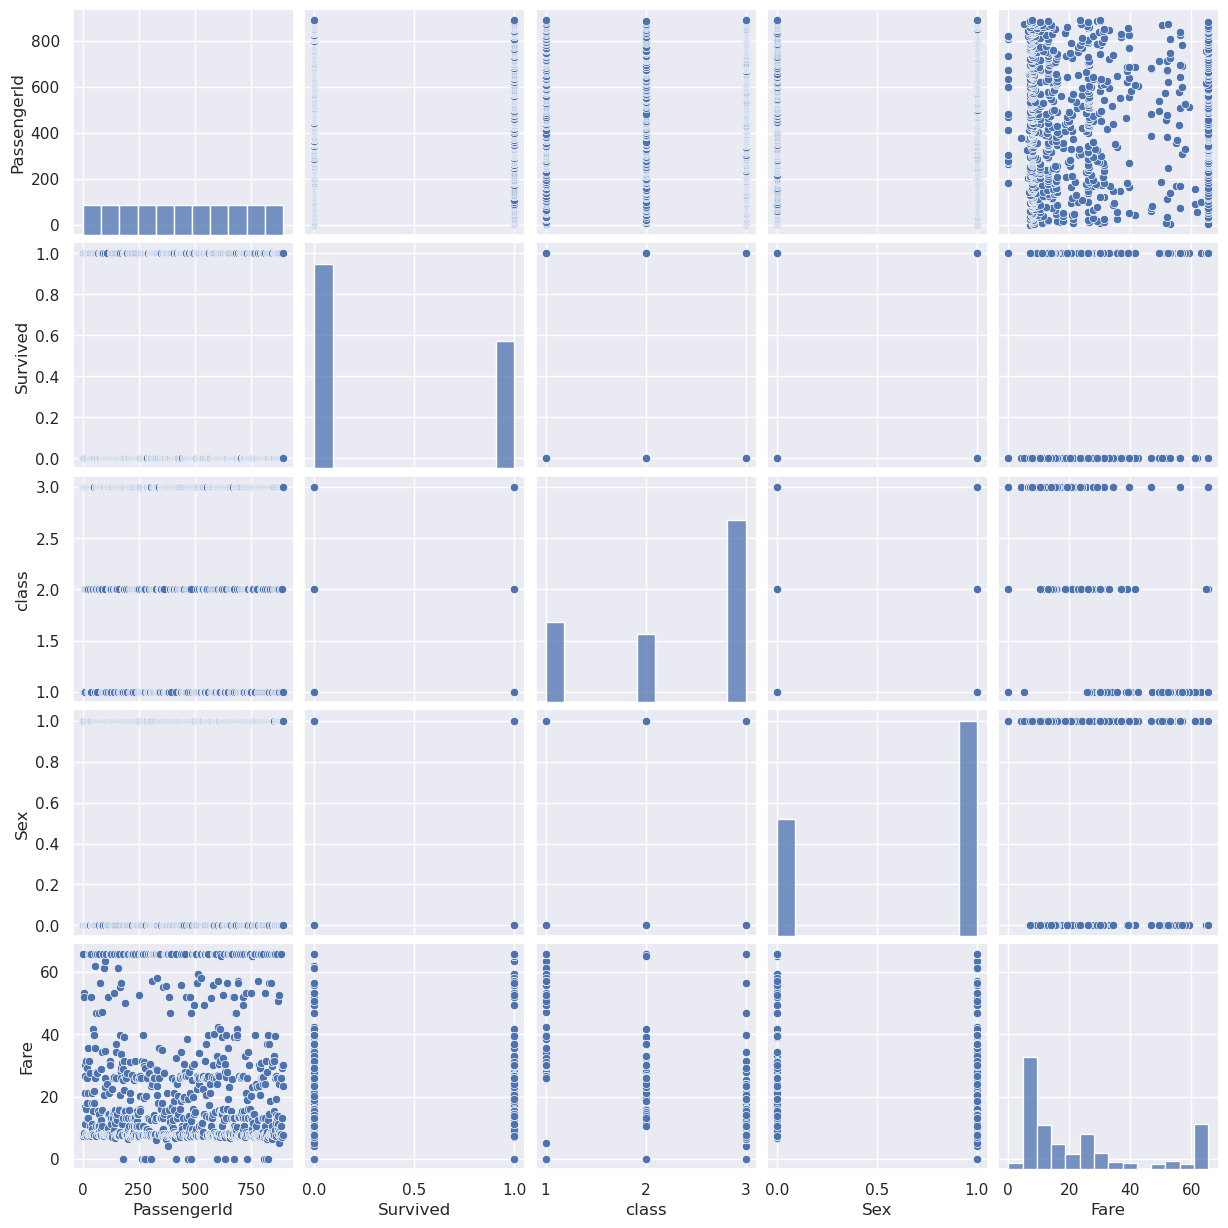

In [20]:
sns.pairplot(df)  #pairplot
plt.show()

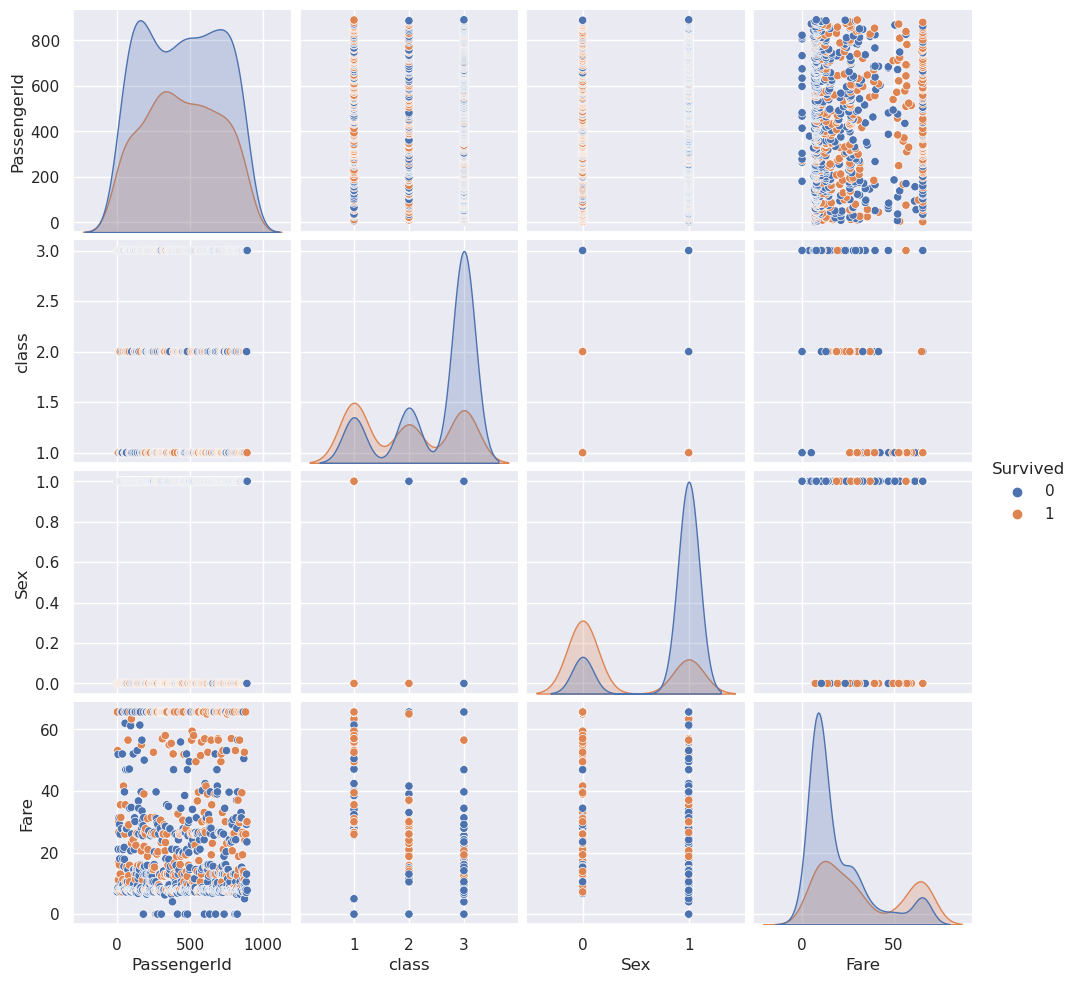

In [21]:
sns.pairplot(df, hue='Survived')  #pairplot
#plt.savefig('plots/pairplot.png')
plt.show()


In [22]:
df.corr()

/tmp/ipykernel_518/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,class,Sex,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.003243
Survived,-0.005007,1.000000,-0.338481,-0.543351,0.317430
class,-0.035144,-0.338481,1.000000,0.131900,-0.715300
Sex,0.042939,-0.543351,0.131900,1.000000,-0.234969
Fare,0.003243,0.317430,-0.715300,-0.234969,1.000000


/tmp/ipykernel_518/3851383611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


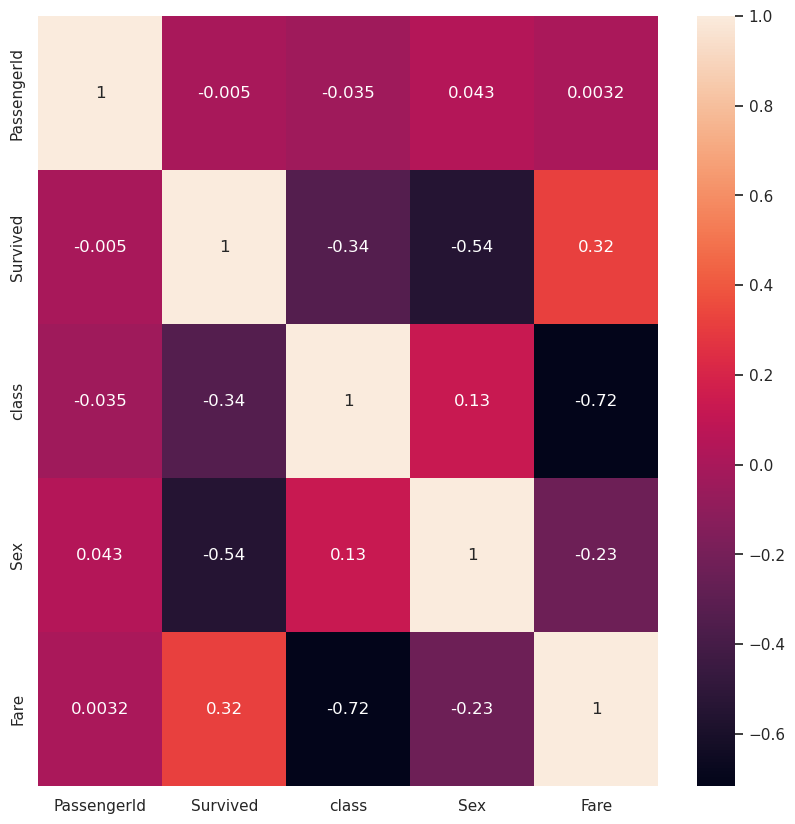

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [24]:
# 1. Arrange the data into featues and target arrays.

# extract features
X_KNN = df.iloc[:,[2,4,5]]
y_KNN = df.iloc[:,1]

# most correlated features: concave points_mean and parameter mean
# X= df.iloc[:, [3,8]]

print(X_KNN.shape)
print(y_KNN.shape)

(891, 3)
(891,)


In [25]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:
from sklearn.model_selection import train_test_split

X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(
    X_KNN, y_KNN, test_size=0.3, random_state=1, stratify=y_KNN)
print('Labels count in y:', np.bincount(y_KNN))
print('Labels count in y_train:', np.bincount(y_train_KNN))
print('Labels count in y_test:', np.bincount(y_test_KNN))

print(X_train_KNN.shape)
print(X_test_KNN.shape)
print(X_train_KNN)

Labels count in y: [549 342]
Labels count in y_train: [384 239]
Labels count in y_test: [165 103]
(623, 3)
(268, 3)
     class  Sex     Fare
472    2.0  0.0  27.7500
597    3.0  1.0   0.0000
843    3.0  1.0   6.4375
112    3.0  1.0   8.0500
869    3.0  1.0  11.1333
..     ...  ...      ...
650    3.0  1.0   7.8958
241    3.0  0.0  15.5000
265    2.0  1.0  10.5000
15     2.0  0.0  16.0000
464    3.0  1.0   8.0500

[623 rows x 3 columns]


In [26]:
# Standardize the features
# we only wanna standardize the training set not the raw data.
# This is why we do this now
# z = (x - u) / s
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train_KNN)
X_train_KNN_std = sc.transform(X_train_KNN)
X_test_KNN_std = sc.transform(X_test_KNN)

print(X_train_KNN_std.shape)
print(X_test_KNN_std.shape)

(623, 3)
(268, 3)


In [27]:
# 3. Select the ML algorithm, and its parameteters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=24, # chose 24 becasue its the sqrt of number of data
                                           # points in my training set (569)
                           p=2, 
                           metric='minkowski')

In [28]:
# 4. Build the model (.fit)
knn.fit(X_train_KNN_std, y_train_KNN)

KNeighborsClassifier(n_neighbors=24)

In [29]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)
from sklearn import metrics 
y_pred_KNN = knn.predict(X_test_KNN_std)
print(metrics.accuracy_score(y_test_KNN, y_pred_KNN))

0.7985074626865671


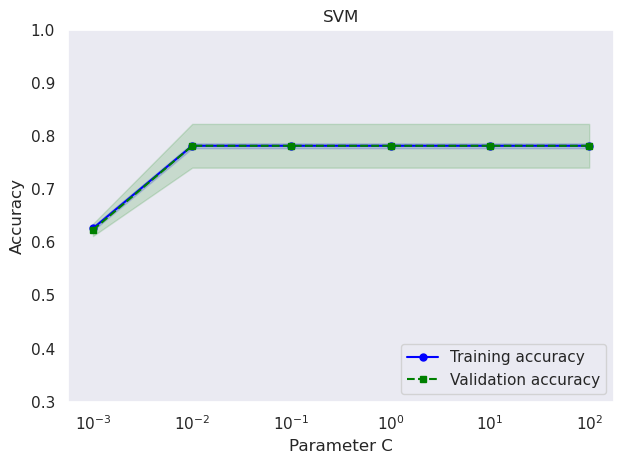

In [30]:
# Produce validation curves (accuracy v. hyperparameter) for both algorithms (SVM=C, kNN= # of neighbors) and identify optimal hyperparameters
from sklearn.model_selection import validation_curve

pipe_svc = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc, 
                X=X_train_SVM, 
                y=y_train_SVM, 
                param_name='svc__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

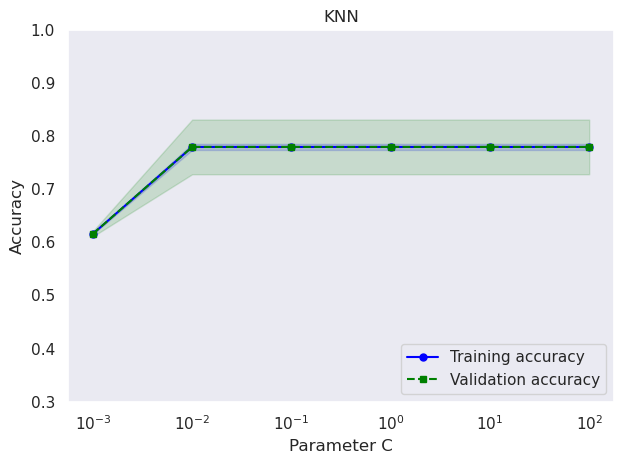

In [31]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc, 
                X=X_train_KNN, 
                y=y_train_KNN, 
                param_name='svc__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [32]:
# Which algorithm of the two algorithms performs better?

# based on the accuracy, SVM is the better algoprithm, specifically the rbf model for this dataset.